In [4]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" 
  value="Click here to toggle on/off the raw code."></form>''')

#### Litter and Canopy layers

This is a simple 1D column with subsurface (Richard's equation), surface flow, and a litter and/or canopy layer on top of the surface water system.

This demonstrates a simple balance equation for water conservation on this layer, with interception/throughfall, drainage of the intercepting layer, and potentially re-wetting of the litter layer (i.e. from ponding water wetting the litter).

![title](data/litter_canopy_fluxes.jpeg)

Author: Ethan Coon

In [1]:
%matplotlib inline
import sys,os
sys.path.append(os.path.join(os.environ['ATS_SRC_DIR'],'tools', 'utils'))
import parse_xmf, parse_ats
import column_data
import colors
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# load the ATS solution
directory = "litter.regression.gold"

dat = column_data.column_data(["saturation_liquid"], directory=directory)
keys, times, dats = parse_ats.readATS(directory, "visdump_surface_data.h5", timeunits='d')
src = parse_ats.getSurfaceData(keys, dats, "surface-source")
litter_wc = parse_ats.getSurfaceData(keys, dats, "litter-water_content")


In the first example, we rain on a litter layer for half a day, then turn off the rain.  The litter saturates in the first few hours, then reaches equilibrium at which the rainfall rate is the same as the drainage rate.  Shortly after the rain (dashed black line) turns off, the litter layer reaches it's background, saturated state.

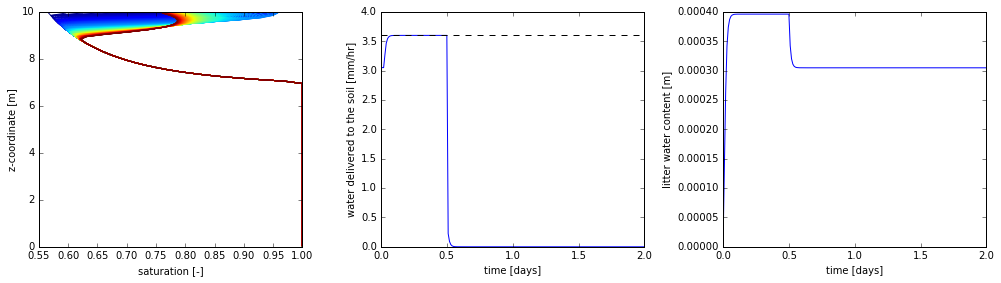

In [3]:
# plot the solution
z = dat[0,0,:]
cm = colors.cm_mapper(0,dat.shape[1]-1) # color the plots as a function of time
fig, axs = plt.subplots(1,3, figsize=(14,4))

for i in range(dat.shape[1]):
    axs[0].plot(dat[1,i,:],z, color=cm(i))

axs[0].set_xlabel('saturation [-]')
axs[0].set_ylabel('z-coordinate [m]')

pr = 1.e-6*1000*86400/24.0
axs[1].plot(times, src/55389.0*1000*86400/24.0)
axs[1].plot([times[0],times[-1]], [pr,pr], 'k--')
axs[1].set_xlabel("time [days]")
axs[1].set_ylabel("water delivered to the soil [mm/hr]")

axs[2].plot(times, litter_wc/55389.)
axs[2].set_xlabel("time [days]")
axs[2].set_ylabel("litter water content [m]")

plt.tight_layout()
plt.show()

The second example shows a column with both litter and dynamic canopy layer.  This includes dynamic BGC (allowing existing PFTs to evolve), with water effects that depend upon the extent of the canopy.  Litter production/decomposition is not included as of yet, and neither is an effective transpiration.  This should only be used for short-time-scale simulations.

In [53]:
# load the ATS solution
directory = "litter-canopy.regression.gold"

dat = column_data.column_data(["saturation_liquid"], directory=directory)
keys, times, dats = parse_ats.readATS(directory, "visdump_surface_data.h5", timeunits='d')
print keys, times

lai = parse_ats.getSurfaceData(keys, dats, "total_leaf_area_index")
pr = parse_ats.getSurfaceData(keys, dats, "precipitation_rain")
litter_src = parse_ats.getSurfaceData(keys, dats, "litter-source")
litter_int = parse_ats.getSurfaceData(keys, dats, "litter-interception")
litter_drn = parse_ats.getSurfaceData(keys, dats, "litter-drainage")


src = parse_ats.getSurfaceData(keys, dats, "surface-mass_source")
litter_wc = parse_ats.getSurfaceData(keys, dats, "litter-water_content")
canopy_wc = parse_ats.getSurfaceData(keys, dats, "canopy-water_content")


[u'0', u'16', u'23', u'30', u'37', u'44', u'51', u'58', u'65', u'72', u'79', u'86', u'93', u'100', u'107', u'114', u'121', u'128', u'135', u'142', u'149', u'156', u'163', u'170', u'177', u'184', u'191', u'198', u'205', u'212', u'219', u'226', u'233', u'240', u'247', u'254', u'261', u'268', u'275', u'282', u'289', u'296', u'303', u'310', u'317', u'324', u'331', u'338', u'345', u'352', u'359', u'366', u'373', u'380', u'387', u'394', u'401', u'408', u'415', u'422', u'429', u'436', u'443', u'450', u'457', u'464', u'471', u'478', u'485', u'492', u'499', u'506', u'513', u'520', u'527', u'534', u'541', u'548', u'555', u'562', u'569', u'576', u'583', u'590', u'597', u'604', u'611', u'618', u'625', u'632', u'639', u'646', u'653', u'660', u'667', u'674', u'681', u'688', u'695', u'702', u'709', u'716', u'723', u'730', u'737', u'744', u'751', u'758', u'765', u'772', u'779', u'786', u'793', u'800', u'807', u'814', u'821', u'828', u'835', u'842', u'849', u'856', u'863', u'870', u'877', u'884', u'891

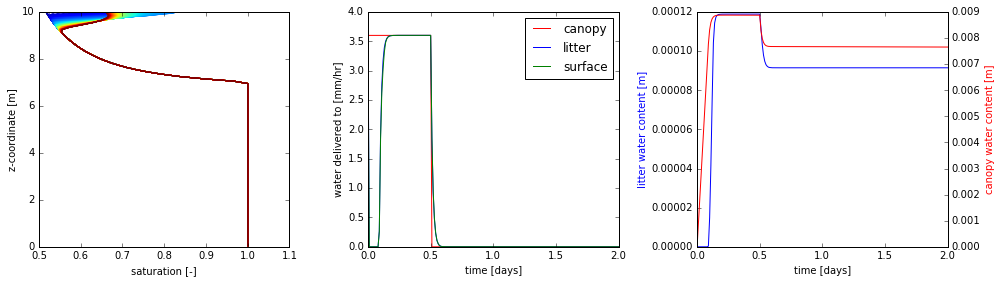

In [54]:
# plot the solution
z = dat[0,0,:]
cm = colors.cm_mapper(0,dat.shape[1]-1) # color the plots as a function of time
fig, axs = plt.subplots(1,3, figsize=(14,4))
ax2 = axs[2].twinx()

for i in range(dat.shape[1]):
    axs[0].plot(dat[1,i,:],z, color=cm(i))

axs[0].set_xlabel('saturation [-]')
axs[0].set_ylabel('z-coordinate [m]')

axs[1].plot(times, pr*1000*86400/24.0, 'r', label="canopy")
axs[1].plot(times, litter_src/55389.0*1000*86400/24.0, 'b', label="litter")
axs[1].plot(times, src/55389.0*1000*86400/24.0, 'g', label="surface")
axs[1].set_xlabel("time [days]")
axs[1].set_ylabel("water delivered to [mm/hr]")
axs[1].legend()

#axs[2].plot(times, lai)
axs[2].plot(times, litter_wc/55389.)
axs[2].set_xlabel("time [days]")
axs[2].set_ylabel("litter water content [m]", color='b')
ax2.plot(times, canopy_wc/55389., 'r')
ax2.set_ylabel("canopy water content [m]", color='r')

plt.tight_layout()
plt.show()

dats.close()